In [5]:
import os
import pandas as pd
import matplotlib.pyplot as plt

def plot_max_discharge_capacity(directory):
    # Lister tous les fichiers CSV dans le répertoire donné
    csv_files = [f for f in os.listdir(directory) if f.endswith('.csv')]

    # Créer une figure pour le graphique
    plt.figure(figsize=(12, 6))  # Augmenter la largeur de la figure

    # #Lire et tracer le maximum de Discharge Capacity pour chaque fichier CSV
    for csv_file in csv_files:
        file_path = os.path.join(directory, csv_file)
        df = pd.read_csv(file_path)

        # Calculer le maximum de Discharge Capacity par Cycle_Index
        max_discharge_capacity = df.groupby('Cycle_Index')['Charge_Capacity'].max()

        # Tracer le maximum de Discharge Capacity pour chaque Cycle_Index
        plt.plot(max_discharge_capacity.index, max_discharge_capacity.values, label=csv_file)

    plt.xlabel('Cycle Index')
    plt.ylabel('Maximum Discharge Capacity')
    plt.title('Maximum Discharge Capacity vs Cycle Index')
    plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')  # Placer la légende à l'extérieur du graphique
    plt.grid(True)
    plt.tight_layout()  # Ajuster le layout pour que tout soit visible
    plt.show()

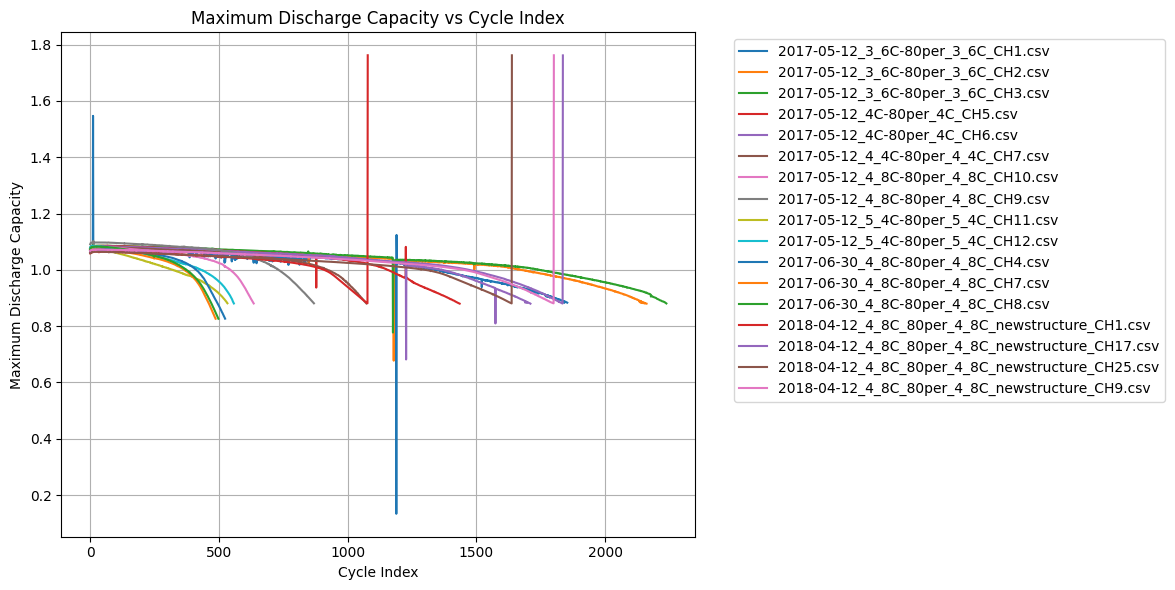

In [6]:

# Exemple d'utilisation
directory = r'C:\Users\pc\Desktop\data\all batchs'  # Utilisation de r pour les chemins Windows
plot_max_discharge_capacity(directory)

Time vs Discharge-Capacity

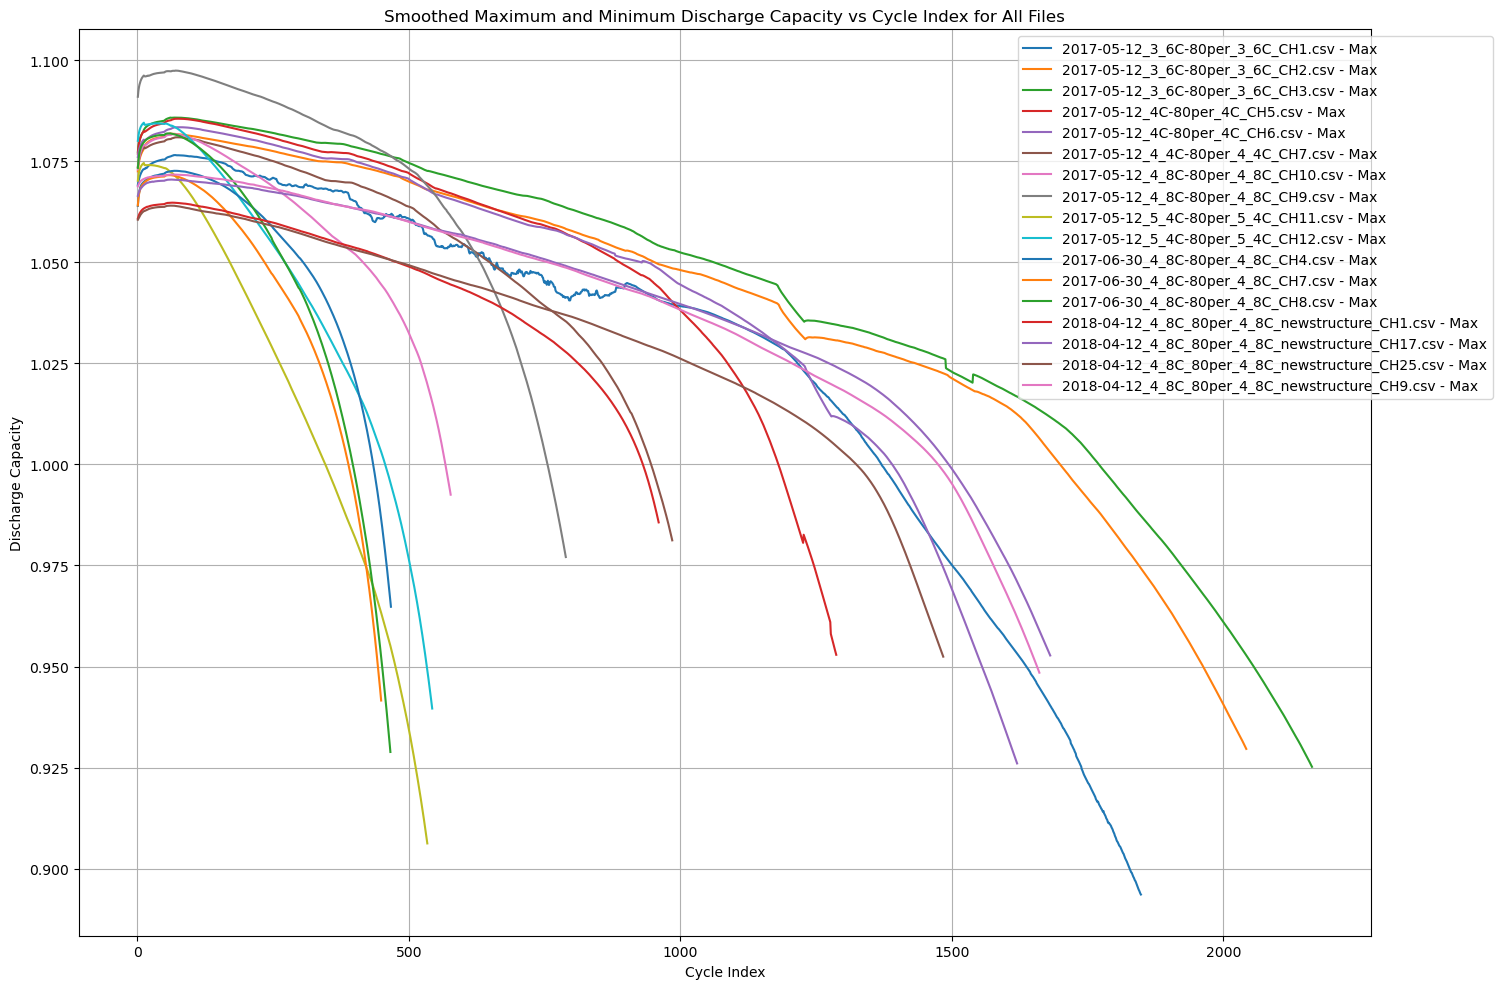

In [1]:
import os
import pandas as pd
import matplotlib.pyplot as plt

def remove_outliers(series):
    # Calculer le premier et le troisième quartile
    Q1 = series.quantile(0.25)
    Q3 = series.quantile(0.75)
    IQR = Q3 - Q1
###
    # Définir les limites pour les valeurs aberrantes
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    # Filtrer les valeurs aberrantes
    return series[(series >= lower_bound) & (series <= upper_bound)]

def smooth_data(series, window_size):
    return series.rolling(window=window_size, min_periods=1).mean()

def plot_all_files_together(directory, window_size=50):
    # Lister tous les fichiers CSV dans le répertoire donné
    csv_files = [f for f in os.listdir(directory) if f.endswith('.csv')]

    # Créer une figure pour le graphique
    plt.figure(figsize=(15, 10))

    # Tracer les données de chaque fichier CSV sur le même graphique
    for csv_file in csv_files:
        file_path = os.path.join(directory, csv_file)
        df = pd.read_csv(file_path)

        # Calculer le maximum de Discharge Capacity par Cycle_Index
        max_discharge_capacity = df.groupby('Cycle_Index')['Discharge_Capacity'].max()
        min_discharge_capacity = df.groupby('Cycle_Index')['Discharge_Capacity'].min()

        # Supprimer les valeurs aberrantes
        max_discharge_capacity_clean = remove_outliers(max_discharge_capacity)
        min_discharge_capacity_clean = remove_outliers(min_discharge_capacity)

        # Lisser les données
        smoothed_max_discharge_capacity = smooth_data(max_discharge_capacity_clean, window_size)
        smoothed_min_discharge_capacity = smooth_data(min_discharge_capacity_clean, window_size)

        # Tracer les données lissées
        plt.plot(smoothed_max_discharge_capacity.index, smoothed_max_discharge_capacity.values, label=f'{csv_file} - Max', linestyle='-')
        #plt.plot(smoothed_min_discharge_capacity.index, smoothed_min_discharge_capacity.values, label=f'{csv_file} - Min', linestyle='--')

    # Ajouter des labels et un titre
    plt.xlabel('Cycle Index')
    plt.ylabel('Discharge Capacity')
    plt.title('Smoothed Maximum and Minimum Discharge Capacity vs Cycle Index for All Files')
    plt.legend(loc='upper right', bbox_to_anchor=(1.1, 1))
    plt.grid(True)
    plt.tight_layout()  # Ajuster le layout pour que tout soit visible

    
    plt.show()

directory = r'C:\Users\pc\Desktop\data\all batchs'  # Utilisation de r pour les chemins Windows
plot_all_files_together(directory)
